### **Learning attractors**

In [2]:
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
# import the necessary modules
import num_gan as ng
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

C:\Users\pinak\Documents\GitHub\GAN


**Load the L63 attractor**

In [10]:
data_folder = 'attractors'
attractor = np.genfromtxt('{}/attractor_l63_1000_500.csv'.format(data_folder), dtype=np.float32, delimiter=',')
random.shuffle(attractor)

**Create a Generative Adversarial Network to "learn" the attractor**

In [11]:
l63_gan = ng.NumGAN(num_nodes=16, num_layers=3, dim=3, noise_dim=2, name='l63_attractor_sampler')
training_data = tf.data.Dataset.from_tensor_slices(attractor[:10000]).batch(1000)
# load a pre-trained model if you don't have time
l63_gan.load()
# train if you have time
l63_gan.train(training_data, epochs=10000)

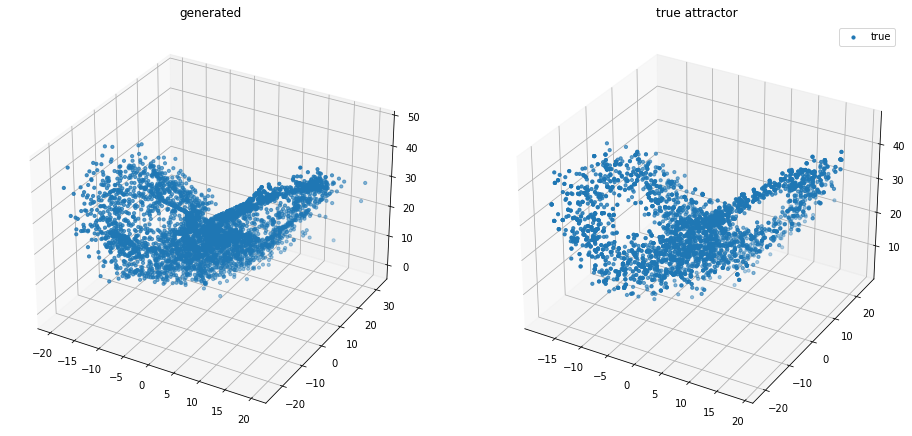

In [19]:
n = 4000
noise = tf.random.normal([n, 2])
gen = l63_gan.generator(noise, training=False)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(gen[:, 0], gen[:, 1], gen[:, 2], label='generated', s=10.0)
ax1.set_title('generated')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(attractor[0:n, 0], attractor[0:n, 1], attractor[0:n, 2], label='true', s=10.0)
ax2.set_title('true attractor')
plt.legend()
plt.show()

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jan 16 12:48:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    32W / 250W |    451MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------